# Statistics and Linear Algebra
Code is from _Python Data Analysis_ by Ivan Idris, Chapter 3. 

Run under Python2.7

## Print descriptions of NumPy & SciPy subpackages

In [2]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pydoc

print 'NumPy version', np.__version__
print 'SciPy version', sp.__version__
print 'Matplotlib version', mpl.__version__

NumPy version 1.12.1
SciPy version 0.19.0
Matplotlib version 2.0.0


In [4]:
def clean(astr):
    s = astr
    # remove multiple spaces
    s = ' '.join(s.split())
    s = s.replace('=','')
    
    return s

def print_desc(prefix, pkg_path):
    for pkg in pu.iter_modules(path=pkg_path):
        name = prefix + "." + pkg[1]
        
        if pkg[2] == True:
            try:
                docstr = pydoc.plain(pydoc.render_doc(name))
                docstr = clean(docstr)
                start = docstr.find("DESCRIPTION")
                docstr = docstr[start: start + 140]
                print name, docstr
            except:
                continue

In [5]:
print_desc("numpy", np.__path__)
print
print
print
print_desc("scipy", sp.__path__)

numpy.compat DESCRIPTION This module contains duplicated code from Python itself or 3rd party extensions, which may be included for the following reasons
numpy.core DESCRIPTION Functions - array - NumPy Array construction - zeros - Return an array of all zeros - empty - Return an uninitialized array - sh
numpy.distutils 
numpy.doc DESCRIPTION Topical documentation  The following topics are available: - basics - broadcasting - byteswapping - constants - creation - gloss
numpy.f2py 
numpy.fft DESCRIPTION Discrete Fourier Transform (:mod:`numpy.fft`)  .. currentmodule:: numpy.fft Standard FFTs ------------- .. autosummary:: :toctre
numpy.lib DESCRIPTION Basic functions used by several sub-packages and useful to have in the main name-space. Type Handling -------------   iscomplexo
numpy.linalg DESCRIPTION Core Linear Algebra Tools ------------------------- Linear algebra basics: - norm Vector or matrix norm - inv Inverse of a squar
numpy.ma DESCRIPTION  Masked Arrays  Arrays sometimes cont

## Basic statistics with NumPy

In [29]:
from scipy.stats import scoreatpercentile

data = np.loadtxt("csv/wind_output_jz.csv", delimiter=',', usecols=(1,), skiprows=1, unpack=True)

print "Max method  ", data.max()
print "Max function", np.max(data)
print
print "Min method  ", data.min()
print "Min function", np.min(data)
print
print "Mean method  ", data.mean()
print "Mean function", np.mean(data)
print
print "Std method  ", data.std()
print "Std function", np.std(data)
print
print "Median                 ", np.median(data)
print "Score at percentile 50 ", scoreatpercentile(data, 50)


Max method   15.96778202
Max function 15.96778202

Min method   0.0
Min function 0.0

Mean method   6.47841100147
Mean function 6.47841100147

Std method   3.88991925162
Std function 3.88991925162

Median                  5.990197182
Score at percentile 50  5.990197182


## Linear algebra with NumPy

In [35]:
A = np.mat("2 4 6; 4 2 6; 10 -4 18")
print A
print

inverse = np.linalg.inv(A)
print "inverse of A\n", inverse
print

print "Check\n", A * inverse
print "Error\n", A * inverse - np.eye(3)


[[ 2  4  6]
 [ 4  2  6]
 [10 -4 18]]

inverse of A
[[-0.41666667  0.66666667 -0.08333333]
 [ 0.08333333  0.16666667 -0.08333333]
 [ 0.25       -0.33333333  0.08333333]]

Check
[[  1.00000000e+00  -2.22044605e-16   0.00000000e+00]
 [  5.55111512e-17   1.00000000e+00   0.00000000e+00]
 [  3.88578059e-16  -4.44089210e-16   1.00000000e+00]]
Error
[[  0.00000000e+00  -2.22044605e-16   0.00000000e+00]
 [  5.55111512e-17  -4.44089210e-16   0.00000000e+00]
 [  3.88578059e-16  -4.44089210e-16   0.00000000e+00]]


In [42]:
print "Solving Ax = b"

A = np.mat("1 -2 1; 0 2 -8; -4 5 9")
print "A=\n", A
b = np.array([0, 8, -9])
print "b=\n", b
print
x = np.linalg.solve(A,b)
print "Solution x = ", x

print "Check   Ax = ", np.dot(A,x)

Solving Ax = b
A=
[[ 1 -2  1]
 [ 0  2 -8]
 [-4  5  9]]
b=
[ 0  8 -9]

Solution x =  [ 29.  16.   3.]
Check   Ax =  [[ 0.  8. -9.]]


In [48]:
print "Finding eigenvalues and eigenvectors"

A = np.mat("3 -2; 1 0")
print "A\n", A
print "Eigenvalues", np.linalg.eigvals(A)
print
eigenvalues, eigenvectors = np.linalg.eig(A)
print "First tuple of eig\n", eigenvalues
print "Second tuple of eig\n", eigenvectors
print
# Check by eigenvalue equation: $Ax = ax$
print "Check:"
for i in range(len(eigenvalues)):
    print "Left\n", np.dot(A, eigenvectors[:,i])
    print "Right\n", eigenvalues[i] * eigenvectors[:,i]
    print

Finding eigenvalues and eigenvectors
A
[[ 3 -2]
 [ 1  0]]
Eigenvalues [ 2.  1.]

First tuple of eig
[ 2.  1.]
Second tuple of eig
[[ 0.89442719  0.70710678]
 [ 0.4472136   0.70710678]]

Check:
Left
[[ 1.78885438]
 [ 0.89442719]]
Right
[[ 1.78885438]
 [ 0.89442719]]

Left
[[ 0.70710678]
 [ 0.70710678]]
Right
[[ 0.70710678]
 [ 0.70710678]]



## Random numbers with Numpy

### Gambling with the binomial distribution
Envisage a 17th-century gambling house where you can wager on tossing pieces of eight. Nine coins are flipped in a popular game. If less than five coins are heads, then you lose one piece of eight; otherwise, you earn one. Let's simulate this, commencing from the `random` module for this purpose.

[ 1000.     0.     0. ...,     0.     0.     0.]
[6 6 3 ..., 3 4 4]
[ 1000.  1001.  1000. ...,   891.   890.   889.]
0 9
652.0 1030.0


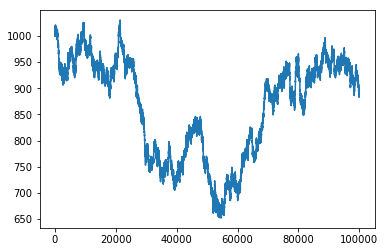

In [97]:
import numpy as np
from matplotlib.pyplot import plot, show

cash = np.zeros(100000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))
print cash
print outcome

for i in range(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i-1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i-1] + 1
    else:
        raise AssertionError("Unexpected outcome " + outcome)

print cash
print outcome.min(), outcome.max()
print cash.min(), cash.max()
plot(np.arange(len(cash)), cash)
show()

### Sampling the normal distribution
$$
\frac{1}
     {\sigma \sqrt{2\pi}} 
e^{\frac{-(b-\mu)^2}
        {2 \sigma^2}}
$$

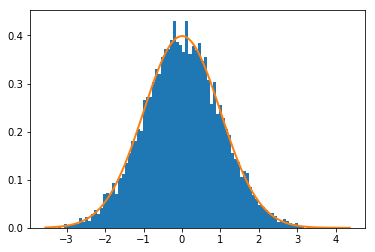

In [137]:
import numpy as np
import matplotlib.pyplot as plt

N=10000

normal_values = np.random.normal(size=N)
_, bins, _ = plt.hist(normal_values, bins=100, normed=True, lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), lw = 2)
plt.show()

### Normality test with SciPy
According to the central limit theorem, a large, random sample with independent observations will converge towards the normal distribution. The properties of the normal distribution are well known and it is considered convenient to use. However, there are a number of requirements that need to be met such as a sufficiently large number of data points, and these data points must be independent. It is a good practice to check whether data conforms to the normal distribution or not. A great number of normality tests exist, some of which have been implemented in the `scipy.stats` package. We will apply these tests in this section. As sample data, we will use flu trends data from `https://www.google.org/flutrends/data.txt`.The original file has been reduced to include only two columns: a date and values for Argentina. 

**Shapiro-Wilk Test**
The Shapiro-Wilk test can check for normality. The corresponding SciPy function returns a tuple of which the first number is a test statistic and the second number is a p-value. It should be noted that the zeros-filled array caused a warning. In fact, all the three functions used in this example had trouble with this array and gave warnings.


**Anderson-Darling Test**
The Anderson-Darling test can check for normality and also for other distributions such as Exponential, Logistic, and Gumbel. The related SciPy function related a test statistic and an array containing critical values for the 15, 10,15, 2.5, and 1 percentage significance levels. If the statistic is larger than the critical value at a significance level, we can reject normality.

**D'Agostino and Pearson's Test**
The D'Agostino and Pearson's test is also implemented in SciPy as the `normaltest()` function. This function returns a tuple with a statistic and p-value just like the `shapiro()` function. The p-value is a two-sided $\chi$-squared probability. $\chi^2$ is another well-known distribution. The test itself is based on z-scores of the skewness and kurtosis tests. Skewness measures how symmetric a distribution is. The normal distribution is symmetric and has zero skewness. Kurtosis tells us something about the shape of the distribution (high piak, fat tail). The normal distribution has a kurtosis of three (the excess kurtosis is zero).

In [155]:
import numpy as np
from scipy.stats import shapiro, anderson, normaltest

flutrends = np.loadtxt("csv/goog_flutrends.csv", delimiter=',', usecols=(1,), skiprows=1, 
                       converters = {1: lambda s: float(s or 0)}, unpack=True)
N = len(flutrends)
normal_values = np.random.normal(size=N)
zero_values = np.zeros(N)

print "Normal Values Shapiro", shapiro(normal_values)
print "Zeroes Shapiro", shapiro(zero_values)
print "Flu Shapiro", shapiro(flutrends)
print
print "Normal Values Anderson", anderson(normal_values)
print "Zeroes Anderson", anderson(zero_values)
print "Flu Anderson", anderson(flutrends)
print 
print "Normal Values normaltest", normaltest(normal_values)
print "Zeroes normaltest", normaltest(zero_values)
print "Flu normaltest", normaltest(flutrends)

Normal Values Shapiro (0.9962940216064453, 0.1263819932937622)
Zeroes Shapiro (1.0, 1.0)
Flu Shapiro (0.9395252466201782, 1.0254650962746286e-15)

Normal Values Anderson AndersonResult(statistic=0.57960993669121308, critical_values=array([ 0.573,  0.652,  0.782,  0.913,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Zeroes Anderson AndersonResult(statistic=nan, critical_values=array([ 0.573,  0.652,  0.782,  0.913,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Flu Anderson AndersonResult(statistic=8.4551562056101375, critical_values=array([ 0.573,  0.652,  0.782,  0.913,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Normal Values normaltest NormaltestResult(statistic=4.1516264201925894, pvalue=0.12545436524335565)
Zeroes normaltest NormaltestResult(statistic=1.0086403948189606, pvalue=0.60391597956170084)
Flu normaltest NormaltestResult(statistic=101.24601047080051, pvalue=1.0344468200653855e-22)


## Creating a NumPy-masked array
???

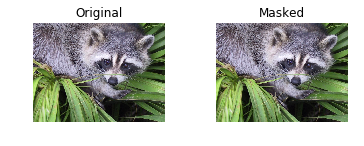

In [171]:
import numpy
import scipy
import matplotlib.pyplot as plt

lena = scipy.misc.face()
random_mask = numpy.random.randint(0, 2, size=lena.shape)

plt.subplot(221)
plt.title("Original")
plt.imshow(lena)
plt.axis('off')

masked_array = numpy.ma.array(lena, mask=random_mask)
# print masked_array

plt.subplot(222)
plt.title("Masked")
plt.imshow(masked_array)
plt.axis('off')

plt.show()

## Disregarding negative and extreme value\
Masked arrays are useful when we desire to ignore negative values, for example, when taking the logarithm of array values. A second use case for masked arrays is outliers. This works based on a higher and lower limit for extreme values.

The salary data of players in the MLB comes originally from http://www.exploredata.net/Downloads/Baseball-Data-Set

Triples [ 0  3  6  9 12 15 18 21 24 27] ...
Signs [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] ...
Signs [-1.  1.  1. -1.  1.  1. -1.  1.  1. -1.] ...
Masked logs [-- 14.970818190308929 15.830413578506539 -- 13.458835614025542
 15.319587954740548 -- 15.648092021712584 13.864300722133706 --] ...
Inside [3750000.0 3175000.0 7500000.0 3000000.0 700000.0 4500000.0 3000000.0
 6250000.0 1050000.0 4600000.0] ...


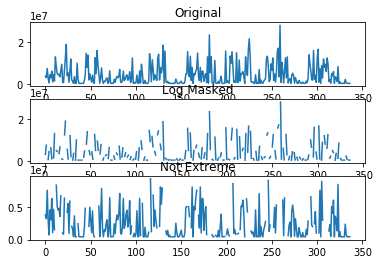

In [186]:
import numpy as np
from datetime import date 
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("csv/MLB2008.csv", delimiter=',', usecols=(2,), skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print "Triples", triples[:10], "..."

signs = np.ones(len(salary))
print "Signs", signs[:10], "..."

signs[triples] = -1
print "Signs", signs[:10], "..."

ma_log = np.ma.log(salary * signs)
print "Masked logs", ma_log[:10], "..."

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)
print "Inside", inside[:10], "..."

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)

plt.show()